# Setting Up:

## Libraries:

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import re
import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Functions:

In [4]:
def model_fit_predict(model):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return y_pred_train, y_pred_test

In [5]:
def reports(y_pred_train, y_pred_test):
    print('Confussion Matrix for train data:\n\n{}'.format(confusion_matrix(y_train, 
                                                                      y_pred_train)))
    print('\nClassification report for train data:\n\n{}'.format(classification_report(y_train, 
                                                                      y_pred_train)))
    print('\nConfussion Matrix for test data:\n\n{}'.format(confusion_matrix(y_test, 
                                                                      y_pred_test)))
    print('\nClassification report for test data:\n\n{}'.format(classification_report(y_test,
                                                                      y_pred_test)))

In [6]:
def reports_grid(y_pred_test):
        print('\nConfussion Matrix for test data:\n\n{}'.format(confusion_matrix(y_test, 
                                                                      y_pred_test)))
        print('\nClassification report for test data:\n\n{}'.format(classification_report(y_test,
                                                                      y_pred_test)))

In [7]:
def feature_importances(model, df):
    """
    The function takes the model and the dataframe and returns a plot showing the 
    importance of each feature.
    """
    features = df.columns[model.feature_importances_.argsort()]
    model.feature_importances_.sort()
    plt.figure(figsize=(15,15))
    n_features = len(features)
    plt.title("Feature importances")
    plt.barh(range(n_features), np.sort(model.feature_importances_),
             color='b',
             align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Relative Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Model Testing - Approach 1:  Considering  all instances as independent events (Naive Method).

In [8]:
data = pd.read_csv('prepared_data.csv')
print('Rows: {}\nColumns: {}'.format(data.shape[0], data.shape[1]))

Rows: 1733108
Columns: 53


In [9]:
data.head()

,match_id,current_time,timestamp,diff_units_infantry,diff_units_ranged,diff_units_siege,diff_units_war_ships,diff_units_cavalry_archers,diff_units_cavalry,diff_units_monks,...,diff_castles,diff_score_military,diff_score_economy,diff_score_technology,diff_score_society,diff_score_total,diff_kills,diff_razes,player_1_wins,diff_rating
0,16720609,0,0,-1,0,0,0,0,1,0,...,0,0,2,0,0,2,0,0,0,43
1,16720609,3,1,-1,0,0,0,0,1,0,...,0,0,2,0,0,2,0,0,0,43
2,16720609,6,2,-1,0,0,0,0,1,0,...,0,0,22,0,0,22,0,0,0,43
3,16720609,9,3,-1,0,0,0,0,1,0,...,0,0,25,0,0,25,0,0,0,43
4,16720609,12,4,-1,0,0,0,0,1,0,...,0,0,28,0,0,28,0,0,0,43


## Data X-y Split:

In [10]:
X = data.drop(['match_id', 'current_time', 'timestamp', 'player_1_wins'], axis=1)
y = data['player_1_wins']

print('X shape: {}\ny shape: {}'.format(X.shape, y.shape))

X shape: (1733108, 49)
y shape: (1733108,)


## Data Balancing:

In [11]:
print('y distribution:')
y.value_counts()

y distribution:


0    878239
1    854869
Name: player_1_wins, dtype: int64

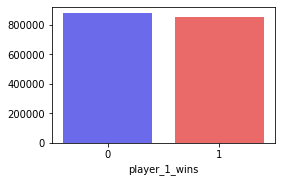

In [12]:
plt.figure(figsize=(4,2.5))
sns.countplot(y, palette='seismic')
plt.ylabel('')
plt.show()

In [12]:
# Under sampling NearMiss(): --> doesn't run

# nm = NearMiss()
# X, y = nm.fit_sample(X, y)

# print('y balanced distribution:')
# y.value_counts()

In [13]:
# Under sampling CondensedNearestNeighbour(): --> doesn't run

# cnn = CondensedNearestNeighbour(random_state=42) 
# X, y = cnn.fit_resample(X, y) 

# print('y balanced distribution:')
# y.value_counts()

In [14]:
# plt.figure(figsize=(4,2.5))
# sns.countplot(y, palette='seismic')
# plt.ylabel('')
# plt.show()

## Data Scaling:

In [15]:
std_scale = StandardScaler()

X = std_scale.fit_transform(X)

## Data Train-Test Split:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=42)

In [17]:
print('X_train shape: {}\ny_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_test shape: {}\ny_test shape: {}'.format(X_test.shape, y_test.shape))

X_train shape: (1213175, 49)
y_train shape: (1213175,)
X_test shape: (519933, 49)
y_test shape: (519933,)


## Baseline: Logistic Regression

In [20]:
y_pred_train, y_pred_test = model_fit_predict(LogisticRegression())

### Results (default parameters):

In [21]:
reports(y_pred_train, y_pred_test)

Confussion Matrix for train data:

[[459549 155218]
 [187015 411393]]

Classification report for train data:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73    614767
           1       0.73      0.69      0.71    598408

    accuracy                           0.72   1213175
   macro avg       0.72      0.72      0.72   1213175
weighted avg       0.72      0.72      0.72   1213175


Confussion Matrix for test data:

[[197255  66217]
 [ 80028 176433]]

Classification report for test data:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73    263472
           1       0.73      0.69      0.71    256461

    accuracy                           0.72    519933
   macro avg       0.72      0.72      0.72    519933
weighted avg       0.72      0.72      0.72    519933



## Baseline: Decision Tree:

In [22]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

y_pred_train = dectree.predict(X_train)
y_pred_test = dectree.predict(X_test)

### Results (default parameters):

In [23]:
reports(y_pred_train, y_pred_test)

Confussion Matrix for train data:

[[614451    316]
 [   473 597935]]

Classification report for train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    614767
           1       1.00      1.00      1.00    598408

    accuracy                           1.00   1213175
   macro avg       1.00      1.00      1.00   1213175
weighted avg       1.00      1.00      1.00   1213175


Confussion Matrix for test data:

[[259315   4157]
 [  4146 252315]]

Classification report for test data:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    263472
           1       0.98      0.98      0.98    256461

    accuracy                           0.98    519933
   macro avg       0.98      0.98      0.98    519933
weighted avg       0.98      0.98      0.98    519933



### Feature Importances:

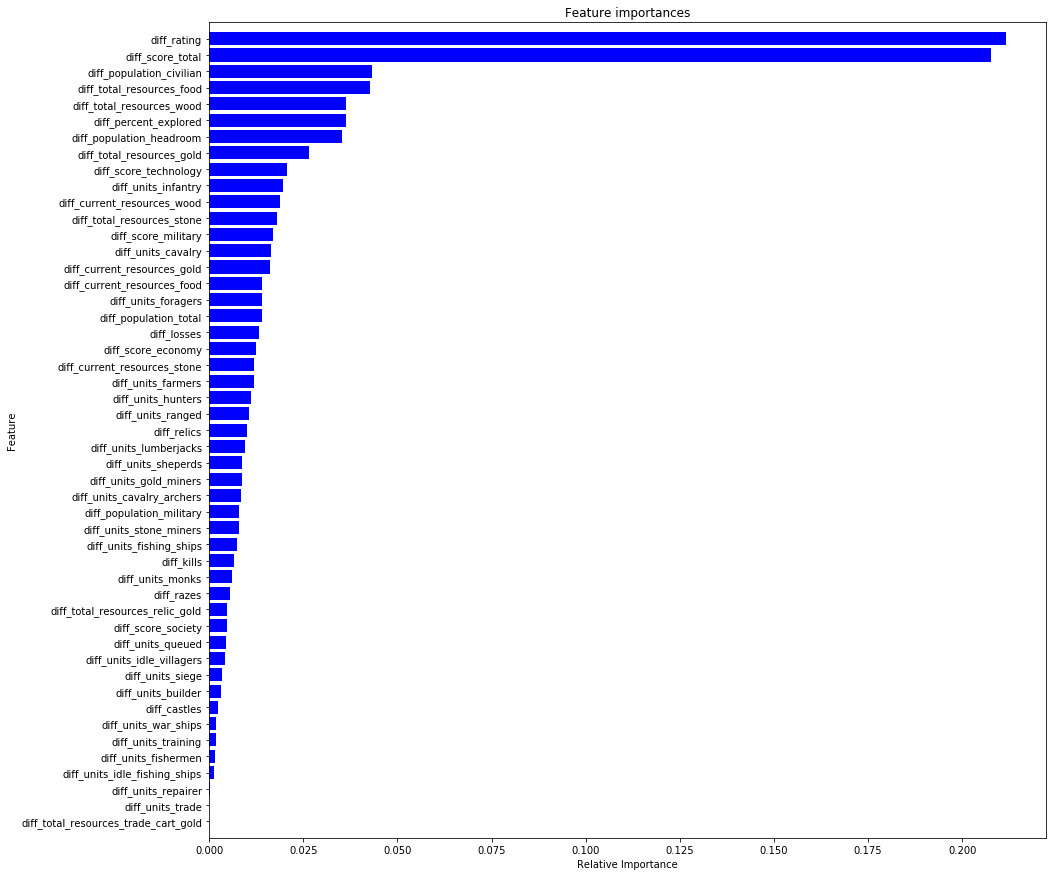

In [24]:
cols_drop = ['match_id', 'current_time', 'timestamp', 'player_1_wins']
feature_importances(dectree, data.drop(cols_drop, axis=1))

## Random Forest:

In [25]:
rfor = RandomForestClassifier()
rfor.fit(X_train, y_train)

y_pred_train = rfor.predict(X_train)
y_pred_test = rfor.predict(X_test)

### Results (default parameters):

In [26]:
reports(y_pred_train, y_pred_test)

Confussion Matrix for train data:

[[614388    379]
 [   410 597998]]

Classification report for train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    614767
           1       1.00      1.00      1.00    598408

    accuracy                           1.00   1213175
   macro avg       1.00      1.00      1.00   1213175
weighted avg       1.00      1.00      1.00   1213175


Confussion Matrix for test data:

[[261998   1474]
 [  2267 254194]]

Classification report for test data:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    263472
           1       0.99      0.99      0.99    256461

    accuracy                           0.99    519933
   macro avg       0.99      0.99      0.99    519933
weighted avg       0.99      0.99      0.99    519933



### Feature Importances:

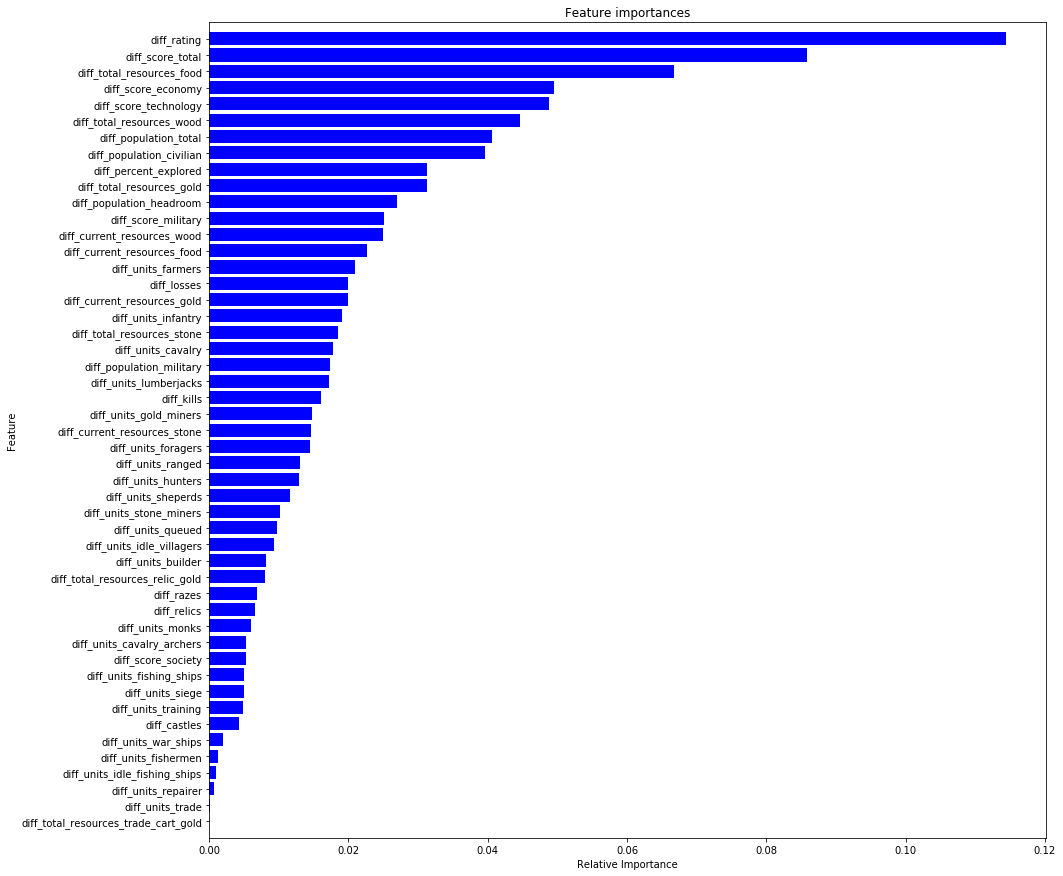

In [27]:
feature_importances(rfor, data.drop(cols_drop, axis=1))

## Linear Support Vector Classification:

In [28]:
y_pred_train, y_pred_test = model_fit_predict(LinearSVC())

### Results (default parameters):

In [29]:
reports(y_pred_train, y_pred_test)

Confussion Matrix for train data:

[[459304 155463]
 [191442 406966]]

Classification report for train data:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73    614767
           1       0.72      0.68      0.70    598408

    accuracy                           0.71   1213175
   macro avg       0.71      0.71      0.71   1213175
weighted avg       0.71      0.71      0.71   1213175


Confussion Matrix for test data:

[[197047  66425]
 [ 81965 174496]]

Classification report for test data:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73    263472
           1       0.72      0.68      0.70    256461

    accuracy                           0.71    519933
   macro avg       0.72      0.71      0.71    519933
weighted avg       0.72      0.71      0.71    519933



## Gaussian Naive Bayes: 

In [30]:
y_pred_train, y_pred_test = model_fit_predict(GaussianNB())

### Results (default parameters):

In [31]:
reports(y_pred_train, y_pred_test)

Confussion Matrix for train data:

[[605765   9002]
 [546757  51651]]

Classification report for train data:

              precision    recall  f1-score   support

           0       0.53      0.99      0.69    614767
           1       0.85      0.09      0.16    598408

    accuracy                           0.54   1213175
   macro avg       0.69      0.54      0.42   1213175
weighted avg       0.69      0.54      0.42   1213175


Confussion Matrix for test data:

[[259709   3763]
 [234744  21717]]

Classification report for test data:

              precision    recall  f1-score   support

           0       0.53      0.99      0.69    263472
           1       0.85      0.08      0.15    256461

    accuracy                           0.54    519933
   macro avg       0.69      0.54      0.42    519933
weighted avg       0.69      0.54      0.42    519933



# Model Testing - Approach 2: Considering  all instances as independent events, just selecting time-dependent features and rejecting 'diff_scores' attributes.

## Data X-y Split:

In [32]:
cols = data.columns
r = re.compile("diff_rating|diff_score.*")
cols_drop = list(filter(r.match, cols)) + ['match_id', 'current_time',
                                           'timestamp',
                                           'player_1_wins']
cols_drop 

['diff_score_military',
 'diff_score_economy',
 'diff_score_technology',
 'diff_score_society',
 'diff_score_total',
 'diff_rating',
 'match_id',
 'current_time',
 'timestamp',
 'player_1_wins']

In [33]:
X = data.drop(cols_drop, axis=1)
y = data['player_1_wins']

print('X shape: {}\ny shape: {}'.format(X.shape, y.shape))

X shape: (1733108, 43)
y shape: (1733108,)


## Data Balancing:

## Data Scaling: 

In [34]:
std_scale = StandardScaler()

X = std_scale.fit_transform(X)

## Data Train-Test Split:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=42)

In [36]:
print('X_train shape: {}\ny_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_test shape: {}\ny_test shape: {}'.format(X_test.shape, y_test.shape))

X_train shape: (1213175, 43)
y_train shape: (1213175,)
X_test shape: (519933, 43)
y_test shape: (519933,)


## K-Nearest Neighbors:

In [37]:
# y_pred_train, y_pred_test = model_fit_predict(KNeighborsClassifier())

In [38]:
# reports(y_pred_train, y_pred_test)

## Logistic Regression:

In [39]:
y_pred_train, y_pred_test = model_fit_predict(LogisticRegression())

### Results (default parameters):

In [40]:
reports(y_pred_train, y_pred_test)

Confussion Matrix for train data:

[[462810 151957]
 [217058 381350]]

Classification report for train data:

              precision    recall  f1-score   support

           0       0.68      0.75      0.71    614767
           1       0.72      0.64      0.67    598408

    accuracy                           0.70   1213175
   macro avg       0.70      0.70      0.69   1213175
weighted avg       0.70      0.70      0.69   1213175


Confussion Matrix for test data:

[[198352  65120]
 [ 92997 163464]]

Classification report for test data:

              precision    recall  f1-score   support

           0       0.68      0.75      0.72    263472
           1       0.72      0.64      0.67    256461

    accuracy                           0.70    519933
   macro avg       0.70      0.70      0.69    519933
weighted avg       0.70      0.70      0.69    519933



### GridSearchCV:

In [41]:
'''
c_values = list(10.0**np.arange(-3, 3))

param_grid = [{'C': c_values,
              'penalty': ['l2'],
              'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'multi_class': ['ovr', 'warn']},
              {'C': c_values,
              'penalty': ['l1'],
              'solver' : ['liblinear', 'saga'],
              'multi_class': ['ovr', 'warn']}]

grid = GridSearchCV(LogisticRegression(), param_grid, verbose=1, cv=3, n_jobs=-1, scoring='f1')                 
grid.fit(X_train, y_train)

best_logreg = grid.best_estimator_ 
best_params_logreg = grid.best_params_
print(best_params_logreg)
'''

"\nc_values = list(10.0**np.arange(-3, 3))\n\nparam_grid = [{'C': c_values,\n              'penalty': ['l2'],\n              'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],\n              'multi_class': ['ovr', 'warn']},\n              {'C': c_values,\n              'penalty': ['l1'],\n              'solver' : ['liblinear', 'saga'],\n              'multi_class': ['ovr', 'warn']}]\n\ngrid = GridSearchCV(LogisticRegression(), param_grid, verbose=1, cv=3, n_jobs=-1, scoring='f1')                 \ngrid.fit(X_train, y_train)\n\nbest_logreg = grid.best_estimator_ \nbest_params_logreg = grid.best_params_\nprint(best_params_logreg)\n"

In [43]:
# reports_grid(grid.predict(X_test))

## Decision Tree:

In [44]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

y_pred_train = dectree.predict(X_train)
y_pred_test = dectree.predict(X_test)

### Results (default parameters):

In [45]:
reports(y_pred_train, y_pred_test)

Confussion Matrix for train data:

[[612254   2513]
 [  6669 591739]]

Classification report for train data:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    614767
           1       1.00      0.99      0.99    598408

    accuracy                           0.99   1213175
   macro avg       0.99      0.99      0.99   1213175
weighted avg       0.99      0.99      0.99   1213175


Confussion Matrix for test data:

[[251068  12404]
 [ 14416 242045]]

Classification report for test data:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    263472
           1       0.95      0.94      0.95    256461

    accuracy                           0.95    519933
   macro avg       0.95      0.95      0.95    519933
weighted avg       0.95      0.95      0.95    519933



### Feature Importances:

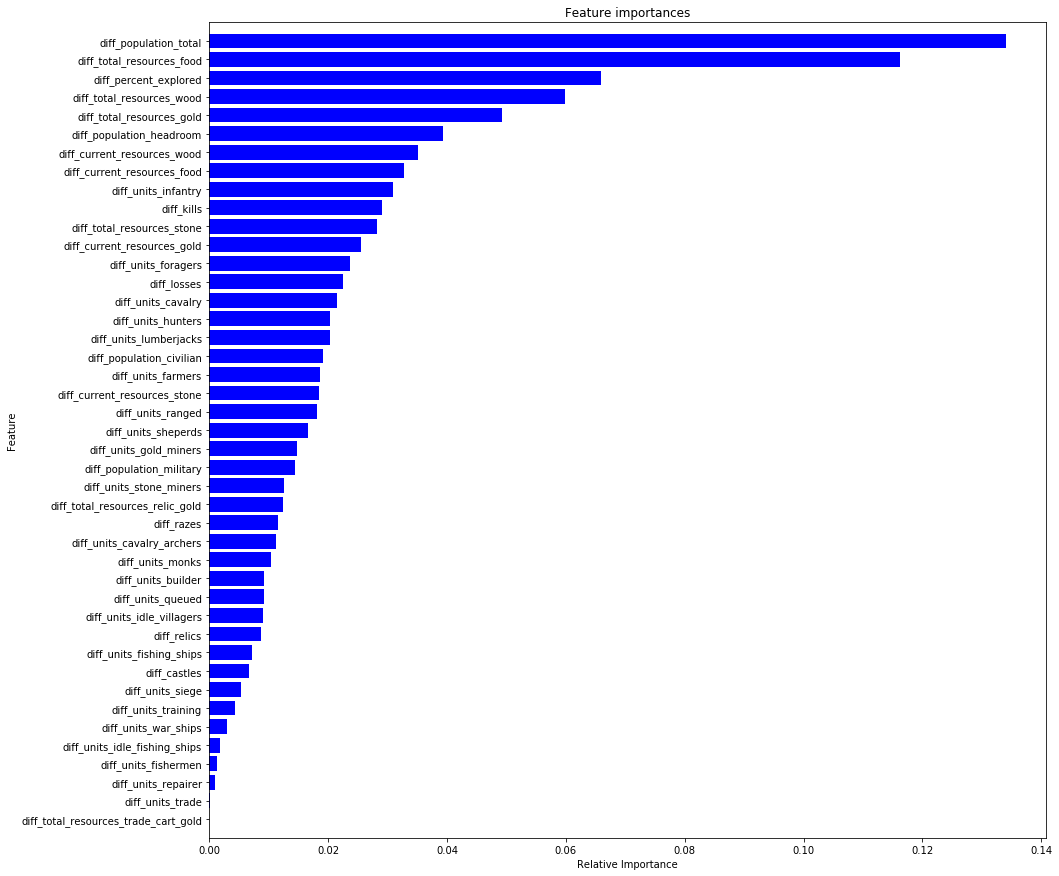

In [46]:
feature_importances(dectree, data.drop(cols_drop, axis=1))

### GridSearchCV:

In [47]:
'''
depth = list(np.arange(2, 10))

param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth' : depth}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose=1, cv=3, n_jobs=-1, scoring='f1')                 
grid.fit(X_train, y_train)  


best_dectree = grid.best_estimator_ 
best_params_dectree = grid.best_params_
print(best_params_dectree)
'''

"\ndepth = list(np.arange(2, 10))\n\nparam_grid = {'criterion': ['gini', 'entropy'],\n              'splitter': ['best', 'random'],\n              'max_depth' : depth}\n\ngrid = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose=1, cv=3, n_jobs=-1, scoring='f1')                 \ngrid.fit(X_train, y_train)  \n\n\nbest_dectree = grid.best_estimator_ \nbest_params_dectree = grid.best_params_\nprint(best_params_dectree)\n"

In [48]:
#reports_grid(grid.predict(X_test))

## Random Forest:

In [49]:
rfor = RandomForestClassifier()
rfor.fit(X_train, y_train)

y_pred_train = rfor.predict(X_train)
y_pred_test = rfor.predict(X_test)

### Results (default parameters):

In [50]:
reports(y_pred_train, y_pred_test)

Confussion Matrix for train data:

[[611447   3320]
 [  5865 592543]]

Classification report for train data:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    614767
           1       0.99      0.99      0.99    598408

    accuracy                           0.99   1213175
   macro avg       0.99      0.99      0.99   1213175
weighted avg       0.99      0.99      0.99   1213175


Confussion Matrix for test data:

[[258040   5432]
 [  7416 249045]]

Classification report for test data:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    263472
           1       0.98      0.97      0.97    256461

    accuracy                           0.98    519933
   macro avg       0.98      0.98      0.98    519933
weighted avg       0.98      0.98      0.98    519933



### Feature Importances:

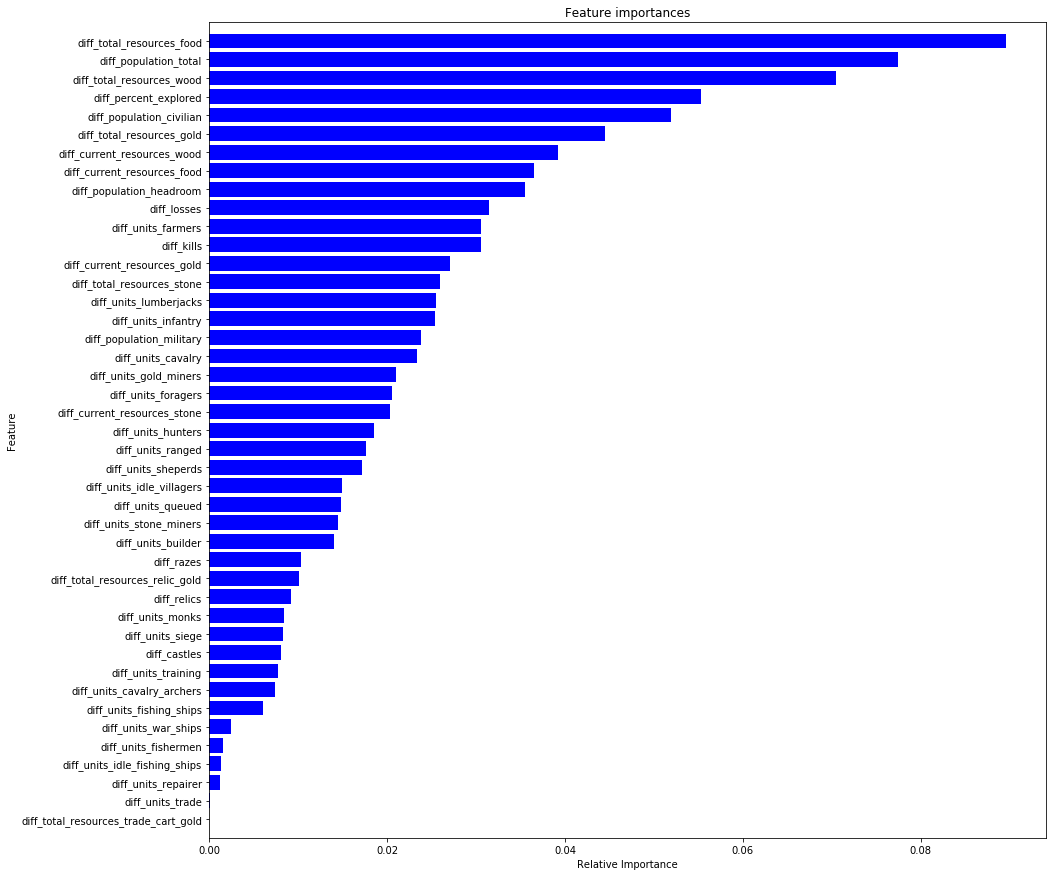

In [51]:
feature_importances(rfor, data.drop(cols_drop, axis=1))

### GridSearchCV:

In [52]:
'''
param_grid = {'n_estimators': [200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}

grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=1, cv=3, n_jobs=-1, scoring='f1')                 
grid.fit(X_train, y_train)  

best_rfor = grid.best_estimator_
best_params_rfor = grid.best_params_
print(best_params_rfor)
'''

"\nparam_grid = {'n_estimators': [200, 500],\n              'max_features': ['auto', 'sqrt', 'log2'],\n              'max_depth' : [4,5,6,7,8],\n              'criterion' :['gini', 'entropy']}\n\ngrid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=1, cv=3, n_jobs=-1, scoring='f1')                 \ngrid.fit(X_train, y_train)  \n\nbest_rfor = grid.best_estimator_\nbest_params_rfor = grid.best_params_\nprint(best_params_rfor)\n"

In [53]:
# reports_grid(grid.predict(X_test))

## Linear Support Vector Classification:

In [54]:
# y_pred_train, y_pred_test = model_fit_predict(LinearSVC())

### Results (default parameters):

In [55]:
# reports(y_pred_train, y_pred_test)

### GridSearchCV:

## Gaussian Naive Bayes:

In [56]:
# y_pred_train, y_pred_test = model_fit_predict(GaussianNB())

### Results (default parameters):

In [57]:
# reports(y_pred_train, y_pred_test)

### GridSearchCV:

# Pipelines: